#**SEUOL BIKE RENTAL PREDICTION USING LINEAR REGRESSION.**

# **Linear Regression**:
Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. It aims to find the best-fitting line that minimizes the difference between the observed values and the values predicted by the model. In simple linear regression, there is only one independent variable, while in multiple linear regression, there are multiple independent variables. Linear regression is commonly used for predictive analysis and understanding the relationship between variables.



# **Exploratory Data Analysis (EDA)**:
Exploratory Data Analysis is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. The primary goal of EDA is to understand the data structure, detect patterns, spot anomalies, and test hypotheses that can guide further analysis. EDA involves techniques such as summary statistics, data visualization (e.g., histograms, scatter plots, box plots), and data cleaning to gain insights into the data's underlying patterns and relationships. It's a crucial step in the data analysis process before building predictive models or drawing conclusions.


# **description about the dataset**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Has Missing Values?

No

Variable Information
Date : year-month-day,
Rented Bike count - Count of bikes rented at each hour,
Hour - Hour of he day,
Temperature-Temperature in Celsius,
Humidity - %,
Windspeed - m/s,
Visibility - 10m,
Dew point temperature - Celsius,
Solar radiation - MJ/m2,
Rainfall - mm,
Snowfall - cm,
Seasons - Winter, Spring, Summer, Autumn,
Holiday - Holiday/No holiday,
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours).

# Also you can see complete description here:https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/seoul bike rental dataset.csv',encoding='unicode_escape')
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30-11-2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30-11-2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30-11-2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30-11-2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes



#**STEP 1 - DATA UNDERSTANDING**

 1 Shape

 2 Head and Tail

 3 dtypes

 4 Info

 5 Describe



In [ ]:
df.shape

(8760, 14)



*   The dataset contains 14 questions and 8760 answers




In [ ]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30-11-2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30-11-2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30-11-2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30-11-2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30-11-2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.dtypes

,0
Date,object
Rented Bike Count,int64
Hour,int64
Temperature(°C),float64
Humidity(%),int64
Wind speed (m/s),float64
Visibility (10m),int64
Dew point temperature(°C),float64
Solar Radiation (MJ/m2),float64
Rainfall(mm),float64




*   Dataset contains mixture of three datatypes(float,int and object)



In [ ]:
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df.Holiday.unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [ ]:
df.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

* when we cross check the climate changes and all at seoul at wikipedia, we can confirm that the above values are correct.

# **STEP  - FEATURE UNDERSTANDING**

1 Plotting feature distributions

2 Histogram

3 KDE

4 Box plot etc...

In [ ]:
columns_to_drop = ['Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Rainfall(mm)', 'Snowfall (cm)']
df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Dew point temperature(°C),Solar Radiation (MJ/m2)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,4.073813,0.569111
std,644.997468,6.922582,11.944825,13.060369,0.868746
min,0.000000,0.000000,-17.800000,-30.600000,0.000000
25%,191.000000,5.750000,3.500000,-4.700000,0.000000
50%,504.500000,11.500000,13.700000,5.100000,0.010000
75%,1065.250000,17.250000,22.500000,14.800000,0.930000
max,3556.000000,23.000000,39.400000,27.200000,3.520000


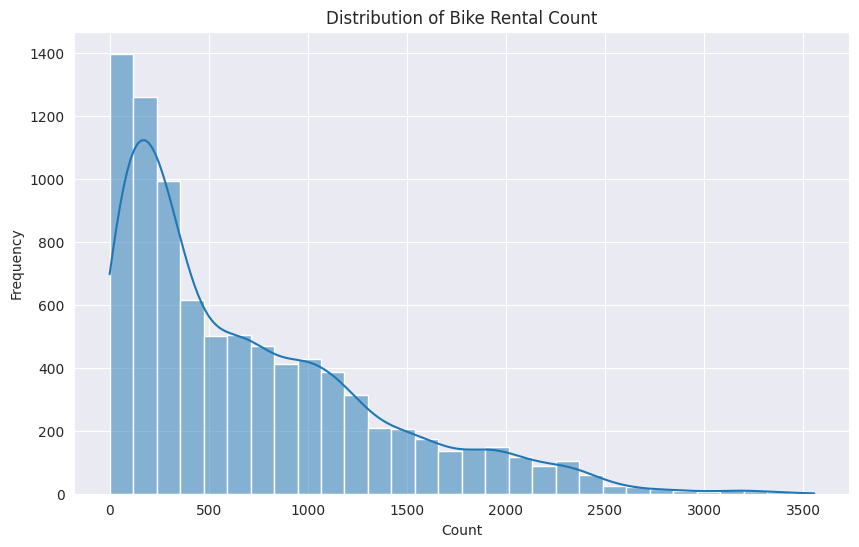

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Rented Bike Count', bins=30, kde=True)
plt.title('Distribution of Bike Rental Count')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Temperature vs. Bike Rental Count')

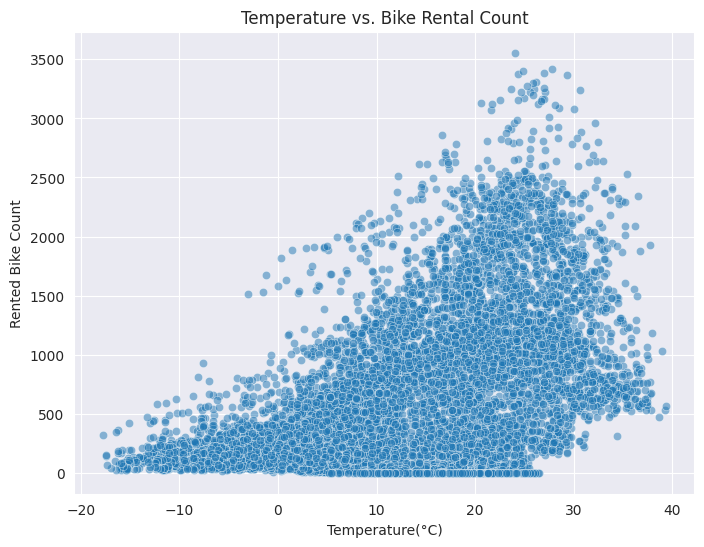

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Temperature(°C)', y='Rented Bike Count', alpha=0.5)
plt.title('Temperature vs. Bike Rental Count')


* Here we can able to see that the bike rent is max at temperature 10 to 30, the means everyone will prefere to rent bike at these temparatures.

<Axes: xlabel='Rented Bike Count', ylabel='Seasons'>

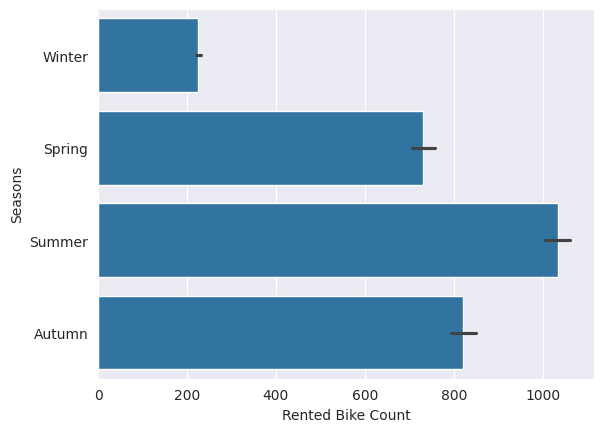

In [ ]:
sns.barplot(data=df,x='Rented Bike Count',y='Seasons')

* Number of bike rent are more at summer season.

<Axes: xlabel='Rented Bike Count', ylabel='Holiday'>

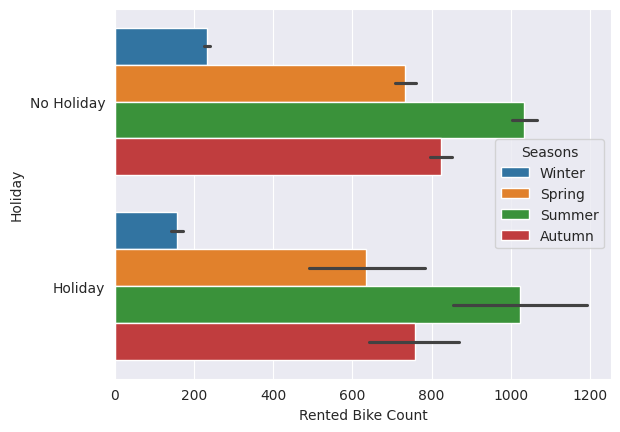

In [ ]:
sns.barplot(data=df,x='Rented Bike Count',y='Holiday',hue='Seasons')

* This plot is showing that the summer season is more impactfull whether it was holiday or not but the bike rent is more at summer seasons only.

<Axes: xlabel='Dew point temperature(°C)', ylabel='Rented Bike Count'>

<Figure size 2000x1500 with 0 Axes>

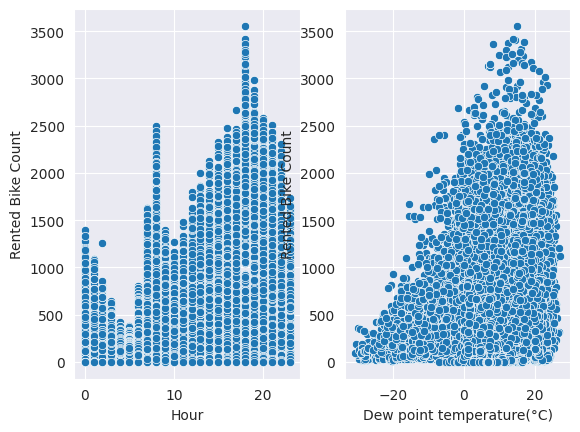

In [ ]:
plt.figure(figsize=(20,15))
fix,axs=plt.subplots(nrows=1,ncols=2)
sns.scatterplot(data=df, x='Hour', y='Rented Bike Count', ax=axs[0])
sns.scatterplot(data=df, x='Dew point temperature(°C)', y='Rented Bike Count', ax=axs[1])



# **Linear regression model**

Let's import the Linear regression libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score


In [ ]:
print(df.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)',
       'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [ ]:
model=LinearRegression()

# Linear Regression using Single Features





In [ ]:
inputs=df[['Temperature(°C)']]
targets=df['Rented Bike Count']
print('Inputs.shape:',inputs.shape)
print('Targets.shape:',targets.shape)



Inputs.shape: (8760, 1)
Targets.shape: (8760,)


In [ ]:
model.fit(inputs,targets)

LinearRegression()

In [ ]:
predictions=model.predict(inputs)
predictions

array([178.73079921, 170.00646951, 155.46592002, ..., 405.56337132,
       391.02282183, 385.20660203])

In [ ]:
rmse=np.sqrt(mse(targets,predictions))
rmse

543.4363268944784

In [ ]:
model.coef_

array([29.08109899])

In [ ]:
model.intercept_


329.95251395228223

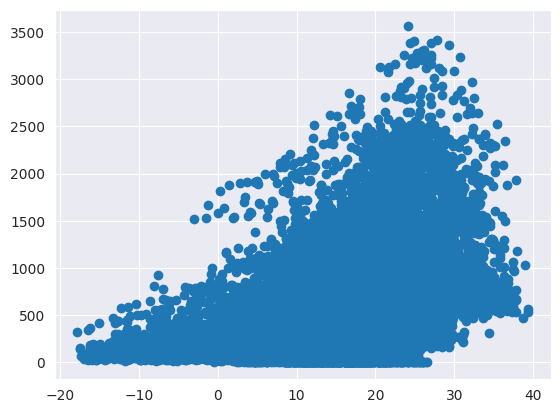

In [ ]:
plt.scatter(inputs,targets)


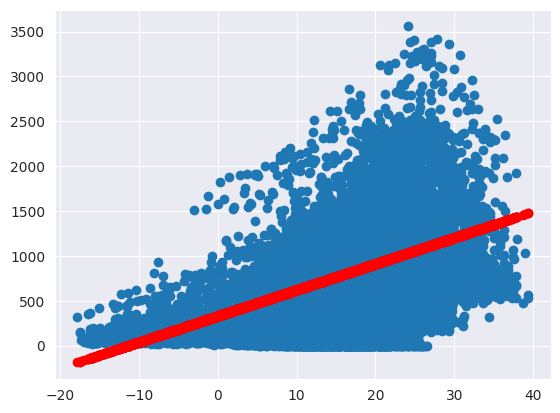

In [ ]:
plt.scatter(inputs,targets)
plt.plot(inputs,model.predict(inputs),'r-o')

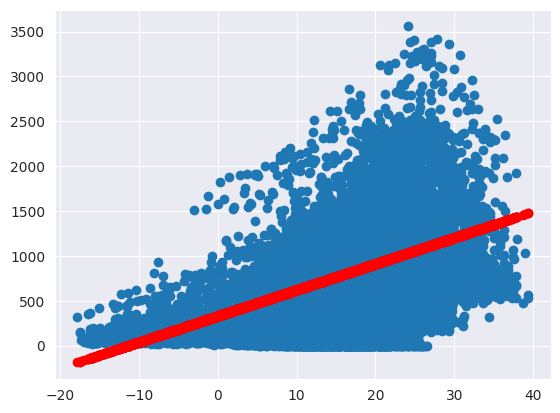

In [ ]:
plt.scatter(inputs,targets)
plt.plot(inputs,predictions,'r-o')

* Here is the best fit line for Rented Bike Count vs Temperature

In [ ]:
# create inputs and targets
inputs, targets =df[['Temperature(°C)']], df['Rented Bike Count']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = np.sqrt(mse(targets,predictions))
print('Loss: ',loss)

Loss:  543.4363268944784


# Linear Regression using Multiple Features

>



In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)',
       'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# create inputs and targets
inputs, targets =df[['Hour','Temperature(°C)','Dew point temperature(°C)','Solar Radiation (MJ/m2)']],df['Rented Bike Count']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = np.sqrt(mse(targets, predictions))
print('Loss: ',loss)

Loss:  477.15788218714897


## Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals




<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

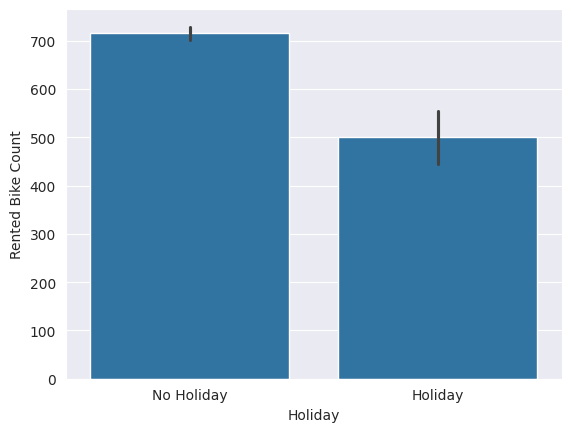

In [ ]:
sns.barplot(data=df, x='Holiday',y ='Rented Bike Count')

In [ ]:
holiday_codes = {'No Holiday':0, 'Holiday': 1}
df['Holiday_code'] =df.Holiday.map(holiday_codes)

In [ ]:
# create inputs and targets
inputs, targets =df[['Hour','Temperature(°C)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Holiday_code']],df['Rented Bike Count']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = np.sqrt(mse(targets, predictions))
print('Loss: ',loss)

Loss:  475.94639631670236


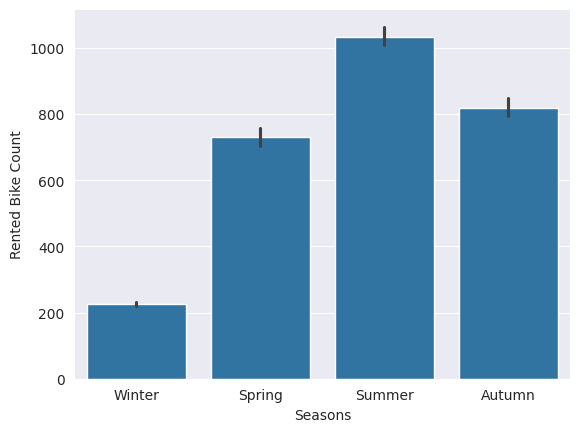

In [ ]:
sns.barplot(data = df, x = 'Seasons', y = 'Rented Bike Count');


### One-hot Encoding

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

![](https://i.imgur.com/n8GuiOO.png)


In [ ]:
from sklearn import preprocessing
encode = preprocessing.OneHotEncoder()
encode.fit(df[['Seasons']])
encode.categories_

[array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object)]

In [ ]:
one_hot=encode.transform(df[['Seasons']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [ ]:
df.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
df[['Winter','Spring','Summer','Autumn']]=one_hot


In [ ]:
# create inputs and targets
inputs, targets =df[['Hour','Temperature(°C)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Holiday_code','Winter','Spring','Summer','Autumn']],df['Rented Bike Count']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = np.sqrt(mse(targets, predictions))
print('Loss: ',loss)

Loss:  470.14589948901033


In [ ]:
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
function_codes = {'No':0, 'Yes': 1}
df['Function_day_code'] =df['Functioning Day'].map(function_codes)

In [ ]:
# create inputs and targets
inputs, targets =df[['Hour','Temperature(°C)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Holiday_code','Winter','Spring','Summer','Autumn','Function_day_code']],df['Rented Bike Count']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = np.sqrt(mse(targets, predictions))
print('Loss: ',loss)

Loss:  442.09155843409724


In [ ]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')
df['Year']=df['Date'].dt.year


In [ ]:
df.Year

,Year
0,2017
1,2017
2,2017
3,2017
4,2017
...,...
8755,2018
8756,2018
8757,2018
8758,2018


In [ ]:
# create inputs and targets
inputs, targets =df[['Hour','Temperature(°C)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Holiday_code','Winter','Spring','Summer','Autumn','Function_day_code','Year']],df['Rented Bike Count']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = np.sqrt(mse(targets, predictions))
print('Loss: ',loss)

Loss:  441.6573631703031


# TESTING THE DATA USING TRAIN_TEST_SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size = 0.2)

In [ ]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = np.sqrt(mse(targets_test, predictions_test))
print('Test Loss:', loss)

Test Loss: 444.63598298233927


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
rvalue=r2_score(targets_test,predictions_test)
rvalue

0.5468285127889374